In [1]:
import gym
import random
import numpy as np 
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from statistics import mean

from mdptoolbox import example
from mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning

In [2]:
p, r = example.forest(S = 600)

# Common Functions

In [5]:
def plot_best_policy(X,Y):
  
    plt.plot(X,Y)  
    plt.title("Iterations VS Mean V values")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V values")
    plt.show()  

def plot_diff_meanv_policy(X,Y):
  
    plt.plot(X,Y)  
    plt.title("Iterations VS Change in value function")
    plt.xlabel("Iterations")
    plt.ylabel("Change in value function")
    plt.show()  

# Value Iteration

In [6]:
discount_list = [0.9,0.95,0.995,0.999]
epsilon_list = [1e-2,1e-3, 1e-6, 1e-9, 1e-12, 1e-15]
max_iterations = 1000

In [7]:
li = []
for discount in discount_list:
    for epsilon in epsilon_list:
        print(f"Running VI for Discount factor : {discount} | Epsilon : {epsilon}")

        vi = ValueIteration(p,r,
                            gamma = discount,
                            max_iter = max_iterations,
                            epsilon = epsilon)
        ret = vi.run()
        policy_vi = list(vi.policy)
        converged_iterations = vi.iter
        
        max_v = ret[-1]['Max V']
        
        avg_vf = np.mean(vi.V)
        
        mean_rewards = []
        for run in ret:
            mean_rewards.append(run['Mean V'])  
            
        li.append([discount,epsilon,max_v,avg_vf,mean(mean_rewards),
                   converged_iterations,policy_vi,mean_rewards])

Running VI for Discount factor : 0.9 | Epsilon : 0.01
Running VI for Discount factor : 0.9 | Epsilon : 0.001
Running VI for Discount factor : 0.9 | Epsilon : 1e-06
Running VI for Discount factor : 0.9 | Epsilon : 1e-09
Running VI for Discount factor : 0.9 | Epsilon : 1e-12
Running VI for Discount factor : 0.9 | Epsilon : 1e-15
Running VI for Discount factor : 0.95 | Epsilon : 0.01
Running VI for Discount factor : 0.95 | Epsilon : 0.001
Running VI for Discount factor : 0.95 | Epsilon : 1e-06
Running VI for Discount factor : 0.95 | Epsilon : 1e-09
Running VI for Discount factor : 0.95 | Epsilon : 1e-12
Running VI for Discount factor : 0.95 | Epsilon : 1e-15
Running VI for Discount factor : 0.995 | Epsilon : 0.01
Running VI for Discount factor : 0.995 | Epsilon : 0.001
Running VI for Discount factor : 0.995 | Epsilon : 1e-06
Running VI for Discount factor : 0.995 | Epsilon : 1e-09
Running VI for Discount factor : 0.995 | Epsilon : 1e-12
Running VI for Discount factor : 0.995 | Epsilon : 1

In [8]:
df_VI = pd.DataFrame(li,
                     columns = ['Discount factor','Epsilon',
                                'max V','Avg VF','Avg Mean V',
                                'Iterations','Policy',
                                'mean_rewards_li'])

In [9]:
df_VI[['Discount factor','Epsilon','max V','Avg VF','Avg Mean V','Iterations']]

,Discount factor,Epsilon,max V,Avg VF,Avg Mean V,Iterations
0,0.900,1.000000e-02,23.089675,5.062660,4.047483,39
1,0.900,1.000000e-03,23.147532,5.116032,4.278322,50
2,0.900,1.000000e-06,23.171679,5.139706,4.618534,83
3,0.900,1.000000e-09,23.172411,5.140437,4.766956,116
4,0.900,1.000000e-12,23.172433,5.140459,4.849677,149
5,0.900,1.000000e-15,23.172434,5.140460,4.901086,181
6,0.950,1.000000e-02,33.139465,9.467977,6.975017,58
7,0.950,1.000000e-03,33.389656,9.715819,7.488425,72
8,0.950,1.000000e-06,33.601115,9.926983,8.388173,116
9,0.950,1.000000e-09,33.623218,9.949086,8.815510,160


In [72]:
vi = ValueIteration(p,r,
                    gamma =0.999,
                    max_iter = max_iterations,
                    epsilon = 1e-15)
ret = vi.run()
policy_vi = list(vi.policy)
converged_iterations = vi.iter

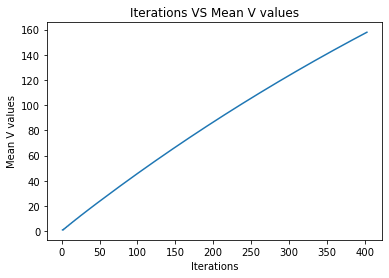

In [73]:
mean_v = [i['Mean V'] for i in ret]
iterations = [i['Iteration'] for i in ret]
plot_best_policy(iterations,mean_v)

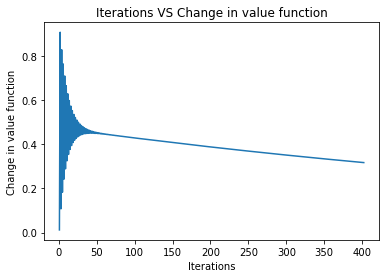

In [74]:
diff_mean_Vs = [j-i for i, j in zip(mean_v[:-1], mean_v[1:])] 
plot_diff_meanv_policy(iterations[0:-1],diff_mean_Vs)

# Policy Iteration

In [10]:
discount_list = [0.7,0.8,0.9,0.95,0.995,0.999]
eval_type_list = [0,1]
max_iterations = 10000

In [11]:
li = []
for discount in discount_list:
    for eval_type in eval_type_list:

        print(f"Running VI for Discount factor : {discount} | Eval type : {eval_type}")

        pi = PolicyIteration(p,r,
                            gamma  = discount,
                            eval_type = eval_type, 
                            max_iter = max_iterations
                            )
        ret = pi.run()
        policy_pi = list(pi.policy)
        converged_iterations = pi.iter
        
        max_v = ret[-1]['Max V']
        
        avg_vf = np.mean(pi.V)
        
        mean_rewards = []
        
        for run in ret:
            mean_rewards.append(run['Mean V'])    

        li.append([discount,eval_type,max_v,avg_vf,mean(mean_rewards),
                   converged_iterations,policy_pi,mean_rewards])

Running VI for Discount factor : 0.7 | Eval type : 0
Running VI for Discount factor : 0.7 | Eval type : 1
Running VI for Discount factor : 0.8 | Eval type : 0
Running VI for Discount factor : 0.8 | Eval type : 1
Running VI for Discount factor : 0.9 | Eval type : 0
Running VI for Discount factor : 0.9 | Eval type : 1
Running VI for Discount factor : 0.95 | Eval type : 0
Running VI for Discount factor : 0.95 | Eval type : 1
Running VI for Discount factor : 0.995 | Eval type : 0
Running VI for Discount factor : 0.995 | Eval type : 1
Running VI for Discount factor : 0.999 | Eval type : 0
Running VI for Discount factor : 0.999 | Eval type : 1


In [12]:
df_PI = pd.DataFrame(li,
                     columns = ['Discount factor','Eval type',
                                'max V','Avg VF','Avg Mean V',
                                'Iterations','Policy',
                                'mean_rewards_li'])

In [13]:
df_PI[['Discount factor','Eval type',
                               'max V','Avg VF','Avg Mean V',
                                'Iterations']]

,Discount factor,Eval type,max V,Avg VF,Avg Mean V,Iterations
0,0.700,0,11.054551,1.930865,1.926287,5
1,0.700,1,11.054486,1.930814,1.926237,5
2,0.800,0,14.883721,2.725873,2.715005,6
3,0.800,1,14.883635,2.725790,2.714922,6
4,0.900,0,23.172434,5.140460,5.115564,10
5,0.900,1,23.172342,5.140368,5.115472,10
6,0.950,0,33.625802,9.951670,9.905166,13
7,0.950,1,33.625705,9.951573,9.905069,13
8,0.995,0,128.243548,95.389271,95.298448,19
9,0.995,1,128.243449,95.389171,95.298349,19


In [81]:
pi = PolicyIteration(p,r,
                    gamma  = 0.999,
                    eval_type = 1, 
                    max_iter = max_iterations
                    )
ret = pi.run()
policy_pi = list(pi.policy)

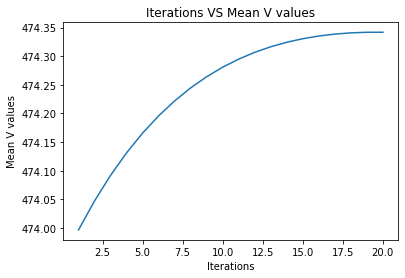

In [82]:
mean_v = [i['Mean V'] for i in ret]
iterations = [i['Iteration'] for i in ret]
plot_best_policy(iterations,mean_v)

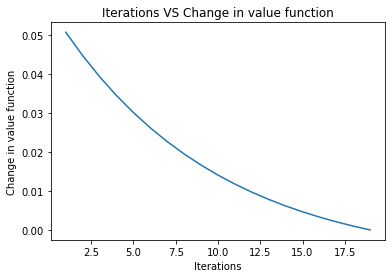

In [83]:
diff_mean_Vs = [j-i for i, j in zip(mean_v[:-1], mean_v[1:])] 
plot_diff_meanv_policy(iterations[0:-1],diff_mean_Vs)

In [17]:
str(policy_vi)

'[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
str(policy_pi)

'[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Q Learning

In [20]:
learning_rate_list = [0.7,0.8,0.9]
gamma_list = [0.9,0.95,0.995,0.999]
epsilon_decay_list = [0.1,0.2,0.5,0.9,0.99,0.999]

In [28]:
li = []
for learning_rate in learning_rate_list:
    for gamma in gamma_list:
        for epsilon_decay in epsilon_decay_list:
            test = QLearning(p, r, gamma=gamma, alpha=learning_rate, epsilon_decay=epsilon_decay, n_iter=10000)
            print(learning_rate,gamma,epsilon_decay)

            runs  = test.run()
            time  = runs[-1]['Time']
            iters = runs[-1]['Iteration']
            
            max_v = runs[-1]['Max V']
            
            policy = test.policy

            mean_rewards = []
            
            for run in runs:
                mean_rewards.append(run['Mean V'])

            li.append([learning_rate,gamma,epsilon_decay,
                       policy,mean(mean_rewards),max_v,mean_rewards])

0.7 0.9 0.1
0.7 0.9 0.2
0.7 0.9 0.5
0.7 0.9 0.9
0.7 0.9 0.99
0.7 0.9 0.999
0.7 0.95 0.1
0.7 0.95 0.2
0.7 0.95 0.5
0.7 0.95 0.9
0.7 0.95 0.99
0.7 0.95 0.999
0.7 0.995 0.1
0.7 0.995 0.2
0.7 0.995 0.5
0.7 0.995 0.9
0.7 0.995 0.99
0.7 0.995 0.999
0.7 0.999 0.1
0.7 0.999 0.2
0.7 0.999 0.5
0.7 0.999 0.9
0.7 0.999 0.99
0.7 0.999 0.999
0.8 0.9 0.1
0.8 0.9 0.2
0.8 0.9 0.5
0.8 0.9 0.9
0.8 0.9 0.99
0.8 0.9 0.999
0.8 0.95 0.1
0.8 0.95 0.2
0.8 0.95 0.5
0.8 0.95 0.9
0.8 0.95 0.99
0.8 0.95 0.999
0.8 0.995 0.1
0.8 0.995 0.2
0.8 0.995 0.5
0.8 0.995 0.9
0.8 0.995 0.99
0.8 0.995 0.999
0.8 0.999 0.1
0.8 0.999 0.2
0.8 0.999 0.5
0.8 0.999 0.9
0.8 0.999 0.99
0.8 0.999 0.999
0.9 0.9 0.1
0.9 0.9 0.2
0.9 0.9 0.5
0.9 0.9 0.9
0.9 0.9 0.99
0.9 0.9 0.999
0.9 0.95 0.1
0.9 0.95 0.2
0.9 0.95 0.5
0.9 0.95 0.9
0.9 0.95 0.99
0.9 0.95 0.999
0.9 0.995 0.1
0.9 0.995 0.2
0.9 0.995 0.5
0.9 0.995 0.9
0.9 0.995 0.99
0.9 0.995 0.999
0.9 0.999 0.1
0.9 0.999 0.2
0.9 0.999 0.5
0.9 0.999 0.9
0.9 0.999 0.99
0.9 0.999 0.999


In [29]:
df_QL = pd.DataFrame(li,
                    columns = ['Learning rate','Gamma','Epilon Decay','Policy','Mean V','Max V','mean v li'])

In [30]:
df_QL.sort_values(by = ['Mean V'],ascending = False)

,Learning rate,Gamma,Epilon Decay,Policy,Mean V,Max V,mean v li
63,0.9,0.995,0.90,"(0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.124560,23.356420,"[0.0015, 0.0015, 0.0015, 0.0029554485, 0.00295..."
69,0.9,0.999,0.90,"(0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",0.117070,20.468886,"[0.0, 0.001485, 0.001485, 0.001485, 0.001485, ..."
64,0.9,0.995,0.99,"(0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.104067,20.694124,"[0.0, 0.0, 0.0, 0.0014554485, 0.0014554485, 0...."
70,0.9,0.999,0.99,"(0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.097607,18.270745,"[0.0, 0.0, 0.0014701500000000001, 0.0014701500..."
66,0.9,0.999,0.10,"(0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.097491,20.538585,"[0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.001..."
...,...,...,...,...,...,...,...
31,0.8,0.950,0.20,"(0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.014660,2.488939,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50,0.9,0.900,0.50,"(0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.014520,2.430092,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.00142648507485, 0...."
48,0.9,0.900,0.10,"(0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.013049,1.835626,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
49,0.9,0.900,0.20,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.013035,1.702920,"[0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.001..."


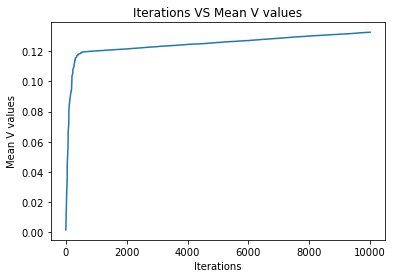

In [31]:
df_QL.sort_values(by = ['Mean V'],ascending = False,inplace = True)
meanv_li = df_QL['mean v li'].values.tolist()[0]
policy_ql = df_QL['Policy'].values.tolist()[0]
iterations = [i for i in range(len(meanv_li))]
plot_best_policy(iterations,meanv_li)

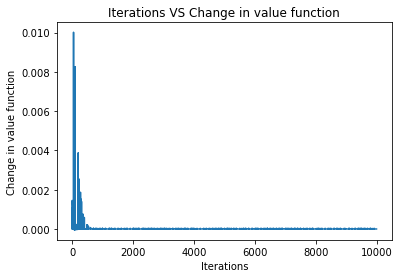

In [32]:
diff_mean_Vs = [j-i for i, j in zip(meanv_li[:-1], meanv_li[1:])] 
plot_diff_meanv_policy(iterations[0:-1],diff_mean_Vs)

In [33]:
str(policy_ql)

'(0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,